In [2]:
import torch
z = torch.load("../state_action_dist_1000_1716063906.587322.pt")



In [3]:
z.keys()

dict_keys(['state_visitation_distribution', 'state_action_distribution'])

In [4]:
import json
z['state_visitation_distribution'] = json.loads(z['state_visitation_distribution'])
z["state_action_distribution"] = json.loads(z["state_action_distribution"])

Text(0.5, 1.0, 'State cardinality over moves')

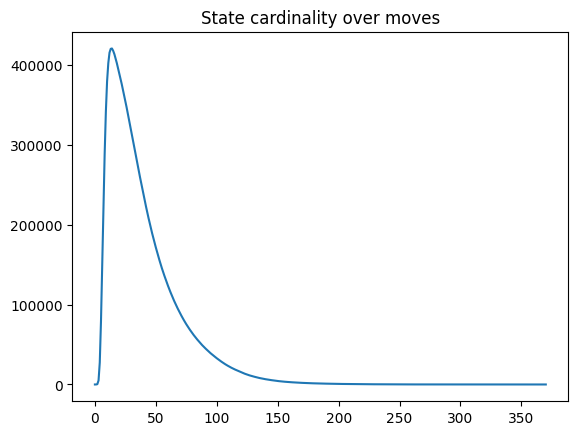

In [5]:
sd = z['state_visitation_distribution']

state_cardinality = []
for i in sd:
    state_cardinality.append(len(sd[i]))
    
#maptlotlib plot lineplot
import matplotlib.pyplot as plt
plt.plot(state_cardinality)
plt.title('State cardinality over moves')


Text(0.5, 1.0, 'State cardinality over moves')

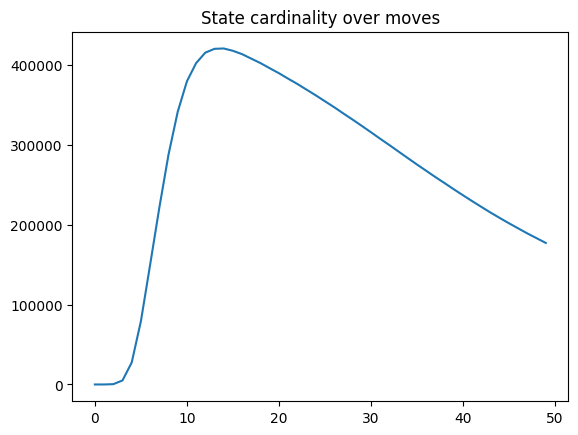

In [6]:
plt.plot(state_cardinality[:50])
plt.title("State cardinality over moves")

Text(0.5, 1.0, 'Max frequency of a given state over moves')

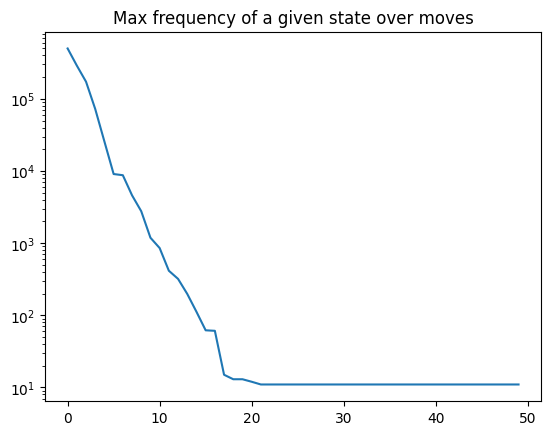

In [7]:
plt.plot([max(z['state_visitation_distribution'][k].values()) for k in z['state_visitation_distribution']][:50])
plt.yscale("log")
plt.title("Max frequency of a given state over moves")

Text(0.5, 1.0, 'Entropy of state visitation distribution over moves')

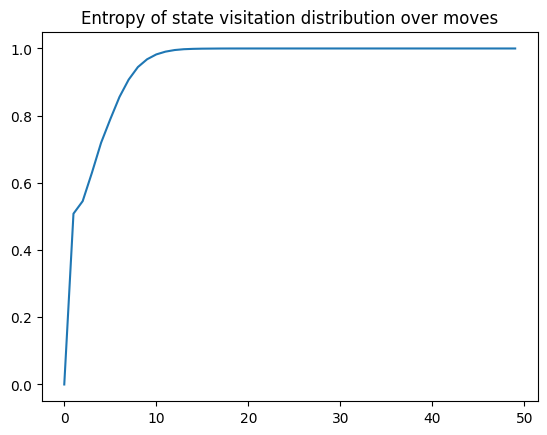

In [8]:
# entropy calculation
import math



def entropy(dictionary, normalize=True):
    # sum of -p(x)log(p(x))
    # p(x) is the probability of a state
    total_size = sum(dictionary.values())
    entropy = 0
    for k in dictionary:
        p = dictionary[k] / total_size
        entropy += -p * math.log(p, 2)
    
    if normalize and len(dictionary.keys()) > 1:
        entropy /= math.log(len(dictionary.keys()), 2)
    return entropy

plt.plot([entropy(z['state_visitation_distribution'][k]) for k in z['state_visitation_distribution']][:50])
plt.title('Entropy of state visitation distribution over moves')
    

In [10]:
from collections import Counter, defaultdict

sa = z['state_action_distribution']
aggregated = Counter()
aggregated_sa = defaultdict(Counter)
for i in sd:
    if (int(i) > 16):
        break
    print(f'aggregating {i}')
    aggregated += Counter(sd[i])    
    for s in sa[i]:
        aggregated_sa[s] += Counter(sa[i][s])

aggregating 0
aggregating 1
aggregating 2
aggregating 3
aggregating 4
aggregating 5


aggregating 6
aggregating 7
aggregating 8
aggregating 9
aggregating 10
aggregating 11
aggregating 12
aggregating 13
aggregating 14
aggregating 15
aggregating 16
aggregating 17
aggregating 18
aggregating 19
aggregating 20
aggregating 21
aggregating 22
aggregating 23
aggregating 24
aggregating 25


In [18]:
entropies = []
for i in sorted(aggregated.items(), key=lambda x: x[1], reverse=True):
    if i[1] > 100:
        entropies.append(entropy(aggregated_sa[i[0]]))
entropies

[0.508959776020426,
 0.5397246196717462,
 0.6103642622373721,
 0.6202463065104142,
 0.6041488857023759,
 0.7147379249457163,
 0.6542874686512403,
 0.5838024763819661,
 0.7180217427304174,
 0.5998114102432105,
 0.564736866814808,
 0.6619422168707548,
 0.7350175040431043,
 0.6810378733390021,
 0.5559928952298865,
 0.7152996019927983,
 0.6516042847418476,
 0.6652806374593967,
 0.6671988559163112,
 0.8322054083310206,
 0.6754184674207825,
 0.6983350992821464,
 0.4137211556591846,
 0.6689946217721283,
 0.7096510933714798,
 0.6103135506516495,
 0.46541886238212193,
 0.6701201562884119,
 0.5680359047340775,
 0.6076465710755954,
 0.6046097379217827,
 0.6676274442217223,
 0.6879487005281373,
 0.7097387718936328,
 0.6359573920593367,
 0.5526525492513774,
 0.6074895426066027,
 0.6373928545108362,
 0.7542503128426736,
 0.65689598327475,
 0.6735520020098776,
 0.677361673486394,
 0.7249777147301542,
 0.6955993600459215,
 0.6882509739398838,
 0.5837050661407438,
 0.7219195332172407,
 0.75819184799842

In [ ]:
len(entropies)

(array([   9.,   16.,   39.,   46.,   87.,  205.,  667., 1042.,  536.,
          34.]),
 array([0.        , 0.09942646, 0.19885292, 0.29827938, 0.39770584,
        0.4971323 , 0.59655877, 0.69598523, 0.79541169, 0.89483815,
        0.99426461]),
 <BarContainer object of 10 artists>)

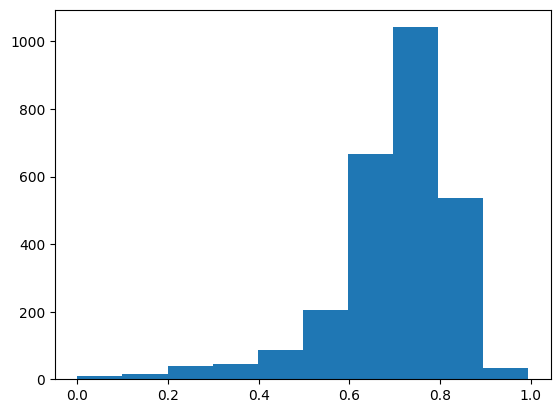

In [19]:
import numpy as np


counts, bins = np.histogram(entropies)
plt.hist(bins[:-1], bins, weights=counts)

Text(0.5, 1.0, 'Entropy of state action distribution over moves')

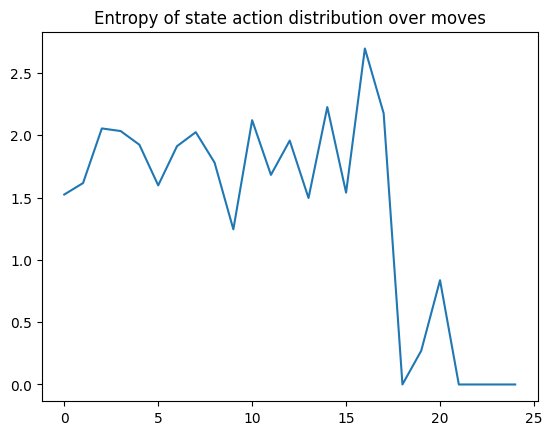

In [ ]:
move_num = 8

# sort by values
# z['state_visitation_distribution'][str(move_num)]

entropies = {}

for i in range(17):
    i = str(i)
    sorted_states = sorted(sd[i].items(), key=lambda x: x[1], reverse=True)
    
    for j in sorted_states:
        if j[1] > 50:            
            entropies[j[0]] = (entropy(z['state_action_distribution'][i][sorted_states[0][0]]))
            
plt.plot(entropies[:25])
plt.title('Entropy of state action distribution over moves') # this one should be a bar chart, or avg'd across multiple moves. use more than just the first most common move as well. idea: just use several common states (with no meaning on x axis), and plot entropy across different datasets. then plot avg  as well. this can give us a table too!

In [ ]:
sorted_states = sorted(sd['1'].items(), key=lambda x: x[1], reverse=True)

In [ ]:
sorted(sd['16'].items(), key=lambda x: x[1], reverse=True)[:10]

[('rnbqkbnr/8/8/pppppppp/8/PPPPPPPP/8/RNBQKBNR w KQkq - 0 9', 61),
 ('rnbqkbnr/8/pppppppp/8/PPPPPPPP/8/8/RNBQKBNR w KQkq - 0 9', 60),
 ('rnbqkbnr/8/8/pppppppp/PPPPPPPP/8/8/RNBQKBNR w KQkq - 0 9', 43),
 ('rnbqkbnr/8/p1p1p1p1/1p1p1p1p/1P1P1P1P/P1P1P1P1/8/RNBQKBNR w KQkq - 0 9',
  31),
 ('rnbqkbnr/8/1p1p1p1p/p1p1p1p1/P1P1P1P1/1P1P1P1P/8/RNBQKBNR w KQkq - 0 9',
  27),
 ('r2q1rk1/ppp2pp1/2np1n1p/2b1p1B1/2B1P1b1/2NP1N1P/PPP2PP1/R2Q1RK1 w - - 0 9',
  27),
 ('rnbqkbnr/8/pppppppp/8/8/PPPPPPPP/8/RNBQKBNR w KQkq - 0 9', 27),
 ('r1b2rk1/ppp2pp1/2np1q1p/2b1p3/2B1P3/2NP1N2/PPP2PPP/R2Q1RK1 w - - 0 9', 23),
 ('r2q1rk1/ppp2ppp/2np1n2/2b1p1B1/2B1P3/2NP1b1P/PPP2PP1/R2Q1RK1 w - - 0 9',
  18),
 ('r2q1rk1/ppp2pp1/2np1n1p/2b1p3/2B1P1bB/2NP1N2/PPP2PPP/R2Q1RK1 w - - 2 9',
  13)]